## 3d 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from kymatio import Scattering2D
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

In [7]:
# Load the NIfTI file
month1 = nib.load('anita_1.nii')
month1_data = month1.get_fdata()
month1_data = month1_data/np.max(month1_data)

month3 = nib.load('anita_3.nii')
month3_data = month3.get_fdata()
month3_data = month3_data/np.max(month3_data)

In [8]:
def max_pooling_3d(input_array, pool_size=(2, 2, 2), stride=(2, 2, 2)):
    # Get the dimensions of the input array
    D, H, W = input_array.shape
    
    # Define the size of the pooling window and the stride
    pool_depth, pool_height, pool_width = pool_size
    stride_depth, stride_height, stride_width = stride

    # Calculate the dimensions of the output array after pooling
    out_depth = (D - pool_depth) // stride_depth + 1
    out_height = (H - pool_height) // stride_height + 1
    out_width = (W - pool_width) // stride_width + 1
    
    # Initialize the output array
    output_array = np.zeros((out_depth, out_height, out_width))

    # Perform max pooling
    for d in range(out_depth):
        for i in range(out_height):
            for j in range(out_width):
                # Extract the current region from the input array
                region = input_array[
                    d * stride_depth : d * stride_depth + pool_depth,
                    i * stride_height : i * stride_height + pool_height,
                    j * stride_width : j * stride_width + pool_width
                ]
                # Compute the maximum value in the current region
                output_array[d, i, j] = np.max(region)
    
    return output_array



In [9]:

mri_volume = max_pooling_3d(month1_data)

In [10]:
print(f'{mri_volume.size*mri_volume.itemsize/1024/1024} MB')

36.62109375 MB


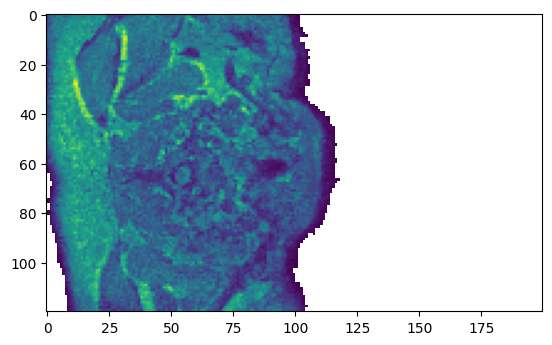

In [18]:
mri_volume.T
plt.imshow(mri_volume[:,:,1])

In [14]:
mri_volume = np.where(mri_volume<0.01, np.nan, mri_volume)

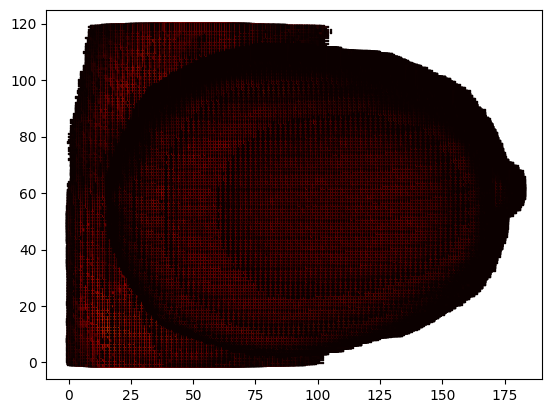

In [33]:
# Importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Assuming `mri_volume` is your pre-existing 3D numpy array representing the MRI volume
# For this example, I'm generating random data. Replace it with your actual MRI data.
# mri_volume = np.random.rand(30, 30, 30)  # Replace with your actual MRI volume data
# Creating the coordinates for the 3D grid
mri_volume2 = mri_volume.transpose(1,0,2)
x, y, z = np.indices(mri_volume2.shape)

# Flatten the arrays for plotting
x = x.flatten()
y = y.flatten()
z = z.flatten()
values = mri_volume2.flatten()  # Flatten MRI volume to get intensity values

img = plt.scatter(x, y, z, c=values, cmap='hot', marker='s')
plt.show()

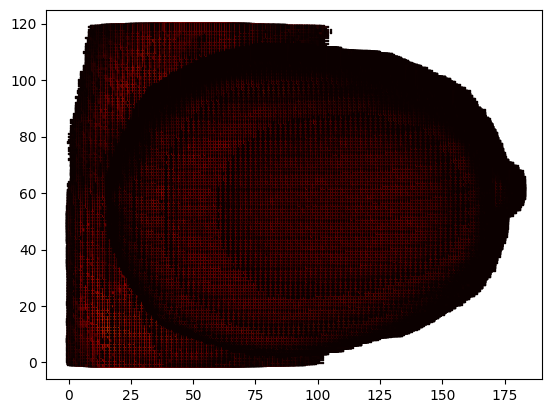

In [28]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# Setting up the color map based on the intensity values of the MRI volume
# color_map = cm.ScalarMappable(cmap=cm.Greens_r)
# color_map.set_array(values)

# Creating the 3D scatter plot, using the MRI volume's intensity to set the color of each point
img = plt.scatter(x, y, z, c=values, cmap='hot', marker='s')
# plt.clim(0,1)
# Adding a color bar to the plot
# plt.colorbar(color_map)

# Adding title and labels
# ax.set_title("3D Heatmap of MRI Volume")
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')

# Displaying plot
plt.show()
